In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset Link https://www.kaggle.com/datasets/rohitgrewal/airlines-flights-data

# ✈️ Indian Domestic Airlines Flight Data Analysis

## 1. Introduction

This dataset contains information on **domestic flights within India**, scraped from the **EaseMyTrip** website. It captures a snapshot of flight details between major Indian cities, offering a rich source of data for analyzing flight patterns, pricing strategies, and airline operations.

The dataset is well-suited for a variety of data analysis and machine learning tasks, such as:

- **Price Prediction**: Building a model to predict flight ticket prices based on various features.
- **Airline Performance Analysis**: Comparing airlines based on the number of flights, routes, and pricing.
- **Route Popularity**: Identifying the most popular flight routes.
- **Demand Forecasting**: Analyzing trends to forecast future flight demand.

---

## 2. Data Dictionary

| Column Name       | Data Type | Description                                                               |
|-------------------|-----------|---------------------------------------------------------------------------|
| `index`           | int64     | A unique identifier for each record.                                     |
| `airline`         | object    | The name of the airline operating the flight.                            |
| `flight`          | object    | The flight number.                                                       |
| `source_city`     | object    | The city where the flight originates.                                    |
| `departure_time`  | object    | The time of day the flight departs (e.g., Morning, Evening).             |
| `stops`           | object    | The number of stops during the flight (zero, one, two_or_more).         |
| `arrival_time`    | object    | The time of day the flight arrives (e.g., Morning, Evening).             |
| `destination_city`| object    | The city where the flight lands.                                         |
| `class`           | object    | The travel class of the seat (Economy or Business).                      |
| `duration`        | float64   | The total duration of the flight in hours.                               |
| `days_left`       | int64     | The number of days left until the departure date.                        |
| `price`           | int64     | The price of the flight ticket in Indian Rupees (₹).                     |

---

## 3. Exploratory Data Analysis (EDA) Highlights

### 🛫 Flight Operations

- **Busiest Airline**: *Vistara* operates the highest number of flights in this dataset, followed closely by *Air India*.
- **Most Popular Route**: The route between **Delhi and Mumbai** is the most frequently operated.
- **Peak Timings**: 
  - Most common **departure time**: *Morning*
  - Most common **arrival time**: *Evening* or *Night*

### 💰 Pricing Insights

Flight prices are influenced by several factors:

- **Airline Brand**: Full-service carriers like *Vistara* and *Air India* generally have **higher average ticket prices** compared to low-cost carriers.
- **Travel Class**: *Business class* tickets are significantly more expensive than *Economy class*.
- **Booking Window**: 
  - Prices are lower when tickets are booked well in advance.
  - Prices increase as the departure date gets closer (Dynamic Pricing).
- **Stops**:
  - **Direct flights (zero stops)** tend to be more expensive than flights with **one or more stops**.

### 👥 Passenger Choices

- **Seat Class**: Majority of passengers choose *Economy class*, showing a higher demand for budget-friendly travel.

---

## 4. Further Reading & Domain Knowledge

To gain a deeper understanding of the airline industry and the factors influencing the data, consider exploring these topics:

- **Dynamic Pricing**: Airlines use complex algorithms to adjust ticket prices based on demand, time, and competition.  
  📘 Suggested Reading: *How Airline Ticket Prices Are Determined*

- **Hub and Spoke Model**: Common airline operation model where flights are routed through a central hub.  
  📘 Suggested Reading: *What Is The Hub And Spoke Model?*

- **Low-Cost Carrier (LCC) vs. Full-Service Carrier (FSC)**: Business model impacts pricing, routes, and services.  
  📘 Suggested Reading: *The Difference Between Full-Service and Low-Cost Airlines*

- **Directorate General of Civil Aviation (DGCA), India**: Regulatory body for civil aviation in India.  
  🌐 [DGCA Official Website](https://dgca.gov.in)

---

> ✅ Ready for further analysis like visualizations, modeling, or creating dashboards!


In [3]:
df = pd.read_csv("airlines_flights_data.csv")

In [4]:
df.sample(9)

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
58225,58225,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Bangalore,Economy,15.83,31,7135
282053,282053,Vistara,UK-860,Hyderabad,Early_Morning,one,Evening,Bangalore,Business,12.00,33,56702
238550,238550,Air_India,AI-687,Mumbai,Afternoon,one,Night,Hyderabad,Business,7.58,10,45693
63408,63408,GO_FIRST,G8-2508,Mumbai,Night,one,Early_Morning,Kolkata,Economy,8.25,13,7412
172566,172566,Indigo,6E-903,Hyderabad,Afternoon,one,Evening,Kolkata,Economy,5.00,18,9764
64829,64829,GO_FIRST,G8-322,Mumbai,Night,one,Early_Morning,Kolkata,Economy,10.75,20,5817
296854,296854,Air_India,AI-538,Chennai,Night,one,Night,Kolkata,Business,26.00,22,55377
23673,23673,GO_FIRST,G8-713,Delhi,Evening,one,Morning,Kolkata,Economy,12.75,21,8850
103341,103341,Air_India,AI-610,Bangalore,Evening,one,Morning,Kolkata,Economy,13.67,6,12634


In [5]:
 df_copy = df.copy()  # Always Make A copy

In [6]:
# Data Cleaning

In [7]:
df_copy.drop(columns = "index",inplace = True)

In [8]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [9]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [10]:
# Geting Satstestical SUmmery

df_copy.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [11]:
df_copy[df_copy["duration"] ==  49.830000] #This is Max duration 45 Hours 

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
193889,Air_India,AI-672,Chennai,Evening,two_or_more,Evening,Bangalore,Economy,49.83,2,23891
194359,Air_India,AI-672,Chennai,Evening,one,Evening,Bangalore,Economy,49.83,9,17538


In [12]:
df_copy[df_copy["duration"] == 0.830000]

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115869,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,6,3498
115943,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,7,3498
116010,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,8,3498
116081,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,9,3498
116163,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,10,3498
116236,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,11,3498
116322,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,12,3498
116411,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,13,3498
116496,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,14,3498
116656,Indigo,6E-357,Bangalore,Night,zero,Night,Chennai,Economy,0.83,16,1924


In [13]:
chep_flights = df_copy[df_copy["price"] == 1105.000000]

In [14]:
chep_flights

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
203807,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,16,1105
203808,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,16,1105
203908,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,17,1105
203909,GO_FIRST,G8-505,Chennai,Evening,zero,Evening,Hyderabad,Economy,1.25,17,1105
204003,AirAsia,I5-517,Chennai,Morning,zero,Morning,Hyderabad,Economy,1.17,18,1105
...,...,...,...,...,...,...,...,...,...,...,...
206601,Indigo,6E-7261,Chennai,Morning,one,Evening,Hyderabad,Economy,7.92,49,1105
206602,Indigo,6E-611,Chennai,Evening,one,Late_Night,Hyderabad,Economy,8.25,49,1105
206603,Indigo,6E-581,Chennai,Morning,one,Evening,Hyderabad,Economy,9.17,49,1105
206604,Indigo,6E-7127,Chennai,Afternoon,one,Night,Hyderabad,Economy,9.50,49,1105


In [15]:
chep_flights["airline"].value_counts()

airline
Indigo      236
AirAsia      32
GO_FIRST     32
Name: count, dtype: int64

In [16]:
# 300 Flight Are Most Cheper andthe coman desatination is  source_city ="Chennai" , destination_city = "Hyderabad"
# ANd Most Chep Flight s Are providead 
# By Indigo      236  and AirAsia & Go_First bot are 32 Each 

In [17]:
# What Are Airliance in the dataset Acomplished  by their Frequenct?

In [18]:
df_copy["airline"].nunique()

6

In [24]:
df_copy["airline"].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [19]:
df_copy["airline"].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\2791532067.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


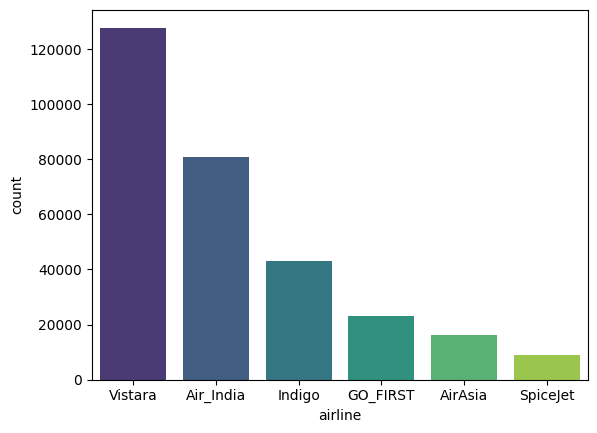

In [33]:
# Countplot with sorted airline names
sns.countplot(
    data=df_copy,
    x="airline",
    order=df_copy["airline"].value_counts().index , palette="viridis"  # sorts descending
)
plt.show()


# Departure ANd Areival

In [35]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [36]:
df_copy["departure_time"].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [42]:
df_copy["arrival_time"].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\4239484583.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\4239484583.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


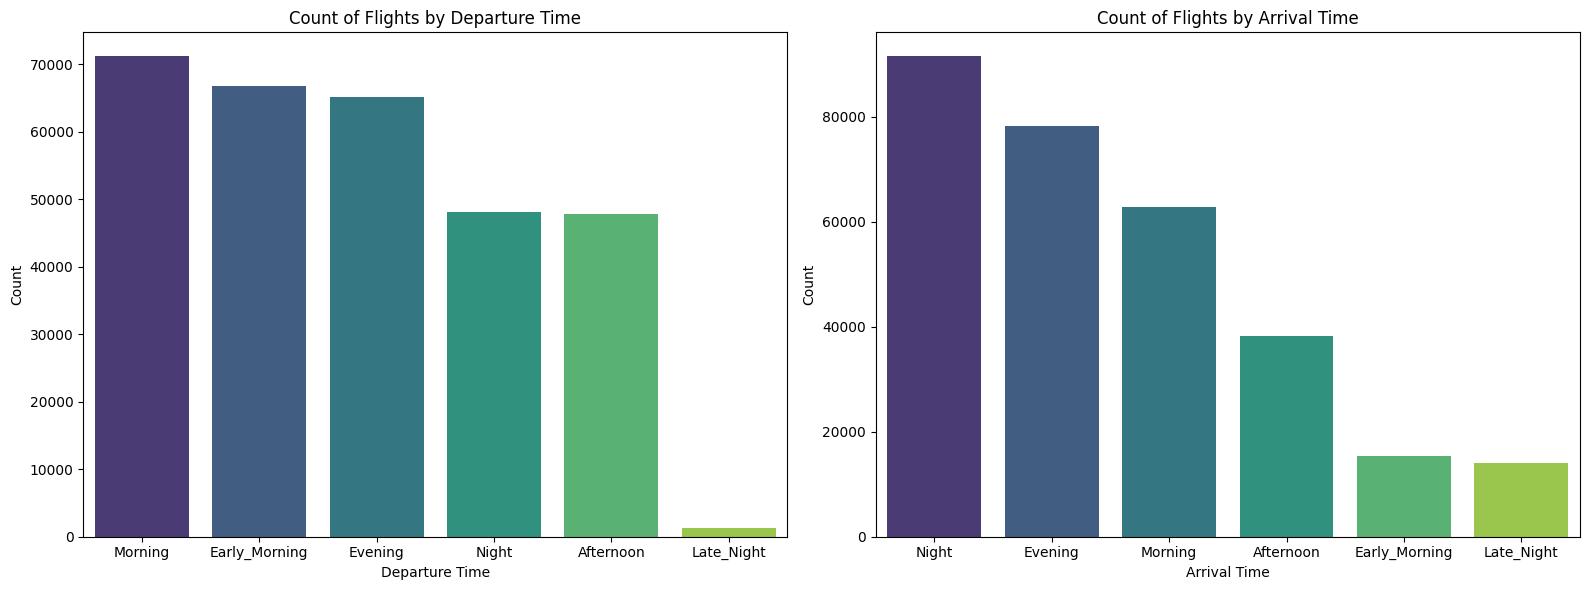

In [68]:
# Create one figure with 2 subplots
plt.figure(figsize=(16, 6))

# --- First subplot: Departure Time ---
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_copy,
    x="departure_time",
    order=df_copy["departure_time"].value_counts().index,
    palette="viridis"
)
plt.title("Count of Flights by Departure Time")
plt.xlabel("Departure Time")
plt.ylabel("Count")


# --- Second subplot: Arrival Time ---
plt.subplot(1, 2, 2)
sns.countplot(
    data=df_copy,
    x="arrival_time",
    order=df_copy["arrival_time"].value_counts().index,
    palette="viridis"
)
plt.title("Count of Flights by Arrival Time")
plt.xlabel("Arrival Time")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


# 3) Graph of Source And Destination City

In [70]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [72]:
df_copy["source_city"].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [73]:
df_copy["destination_city"].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

In [78]:
df_copy[(df_copy["source_city"] == "Delhi") &  (df_copy["destination_city"] == "Mumbai") ].shape

(15289, 11)

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\1285921681.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\1285921681.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


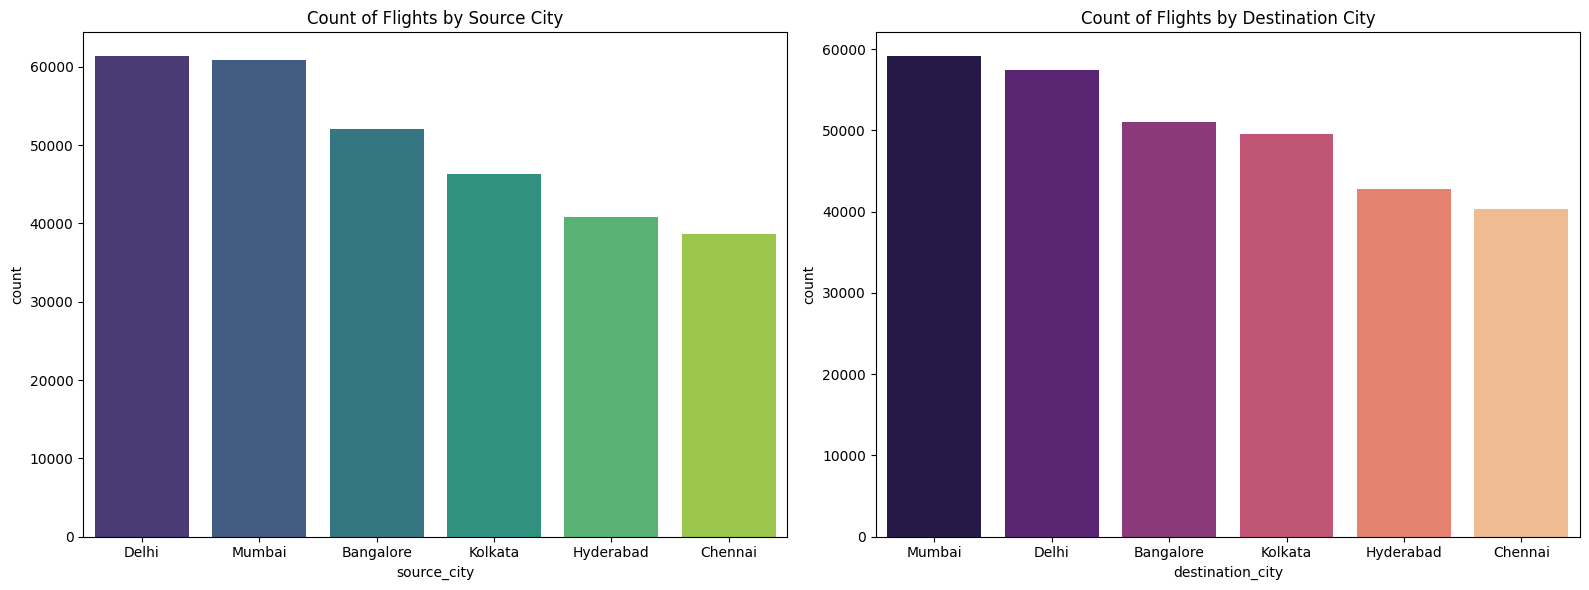

In [84]:
# Create one figure with 2 subplots
plt.figure(figsize=(16, 6))

# --- First subplot: Source City ---
plt.subplot(1, 2, 1)
sns.countplot(
    data=df_copy,
    x="source_city",
    order=df_copy["source_city"].value_counts().index,
    palette="viridis"
)
plt.title("Count of Flights by Source City")

# --- Second subplot: Destination City ---
plt.subplot(1, 2, 2)
sns.countplot(
    data=df_copy,
    x="destination_city",
    order=df_copy["destination_city"].value_counts().index,
    palette="magma"
)
plt.title("Count of Flights by Destination City")

plt.tight_layout()
plt.show()

# Does Price Is Varry With The AirLine

In [85]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [92]:
df.groupby("airline")["price"].mean().sort_values(ascending =True)

airline
AirAsia       4091.072742
Indigo        5324.216303
GO_FIRST      5652.007595
SpiceJet      6179.278881
Air_India    23507.019112
Vistara      30396.536302
Name: price, dtype: float64

In [109]:
m_price = df_copy.groupby(["airline", "class"])["price"].mean().reset_index()

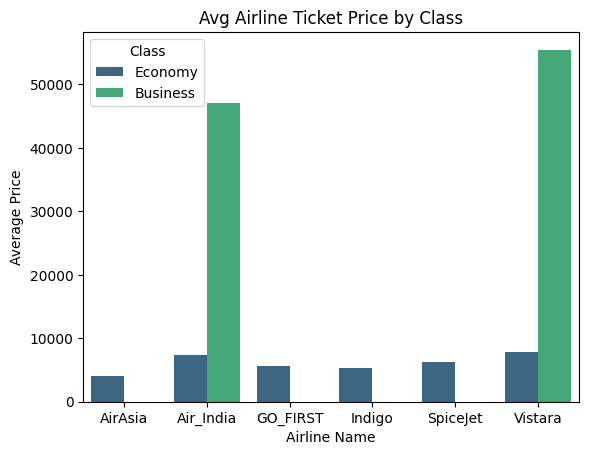

In [113]:
sns.barplot(
    data=m_price,
    x="airline",
    y="price",
    hue="class",
    palette="viridis"
)

plt.title("Avg Airline Ticket Price by Class")
plt.xlabel("Airline Name")
plt.ylabel("Average Price")
plt.xticks(rotation=0)
plt.legend(title="Class")
plt.show()

In [ ]:
# Does Ticket Price Changes On Departure And Arrivel time?

In [115]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [128]:
df_copy.groupby("departure_time")["price"].mean().sort_values(ascending  = True)  # Checking MEna proce Base On departure_time

departure_time
Late_Night        9295.299387
Afternoon        18179.203331
Early_Morning    20370.676718
Evening          21232.361894
Morning          21630.760254
Night            23062.146808
Name: price, dtype: float64

In [129]:
df_copy.groupby("arrival_time")["price"].mean().sort_values(ascending  = True)  # Checking mean proce Base On arrival_time

arrival_time
Late_Night       11284.906078
Early_Morning    14993.139521
Afternoon        18494.598993
Night            21586.758341
Morning          22231.076098
Evening          23044.371615
Name: price, dtype: float64

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\2555709964.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


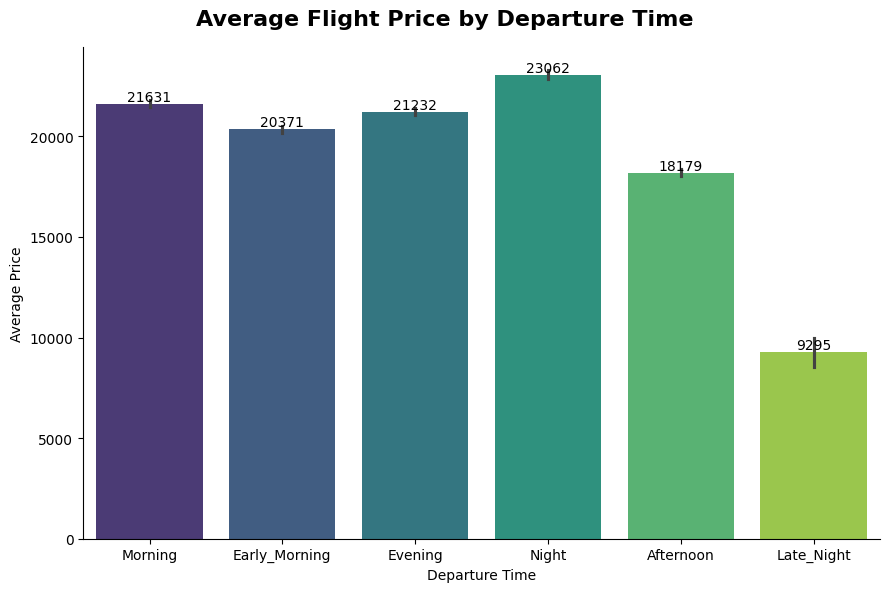

In [133]:
# Order departure times logically
order = df_copy["departure_time"].value_counts().index

# Create catplot
g = sns.catplot(
    x="departure_time",
    y="price",
    kind="bar",
    data=df_copy,
    order=order,
    palette="viridis",
    height=6,
    aspect=1.5
)

# Add title and labels
g.fig.suptitle("Average Flight Price by Departure Time", fontsize=16, weight="bold")
g.set_axis_labels("Departure Time", "Average Price")

# Add numbers on bars
ax = g.facet_axis(0, 0)  # get the axis of the plot
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\3635073276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(


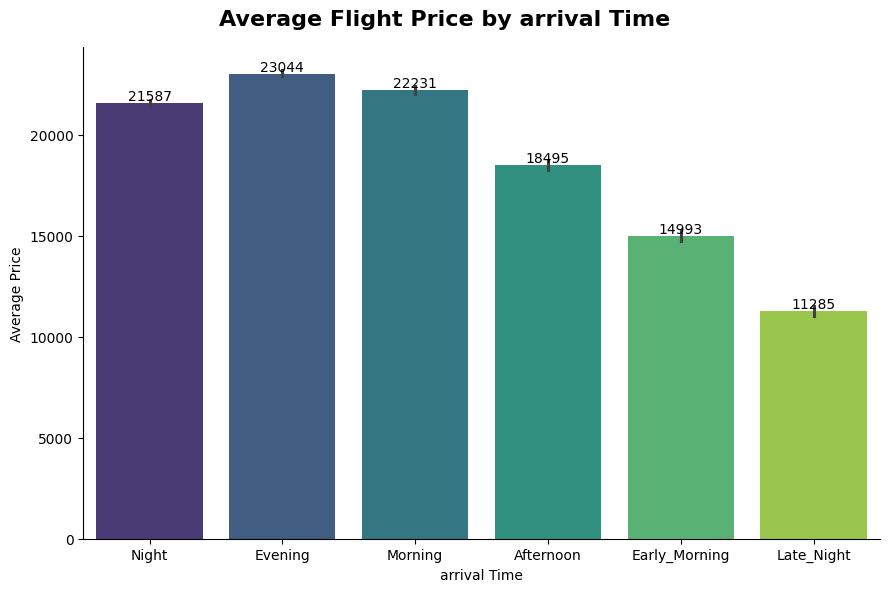

In [134]:
# Order departure times logically
order = df_copy["arrival_time"].value_counts().index

# Create catplot
g = sns.catplot(
    x="arrival_time",
    y="price",
    kind="bar",
    data=df_copy,
    order=order,
    palette="viridis",
    height=6,
    aspect=1.5
)

# Add title and labels
g.fig.suptitle("Average Flight Price by arrival Time", fontsize=16, weight="bold")
g.set_axis_labels("arrival Time", "Average Price")

# Add numbers on bars
ax = g.facet_axis(0, 0)  # get the axis of the plot
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.0f}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

plt.tight_layout()
plt.show()

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\1452115448.py:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


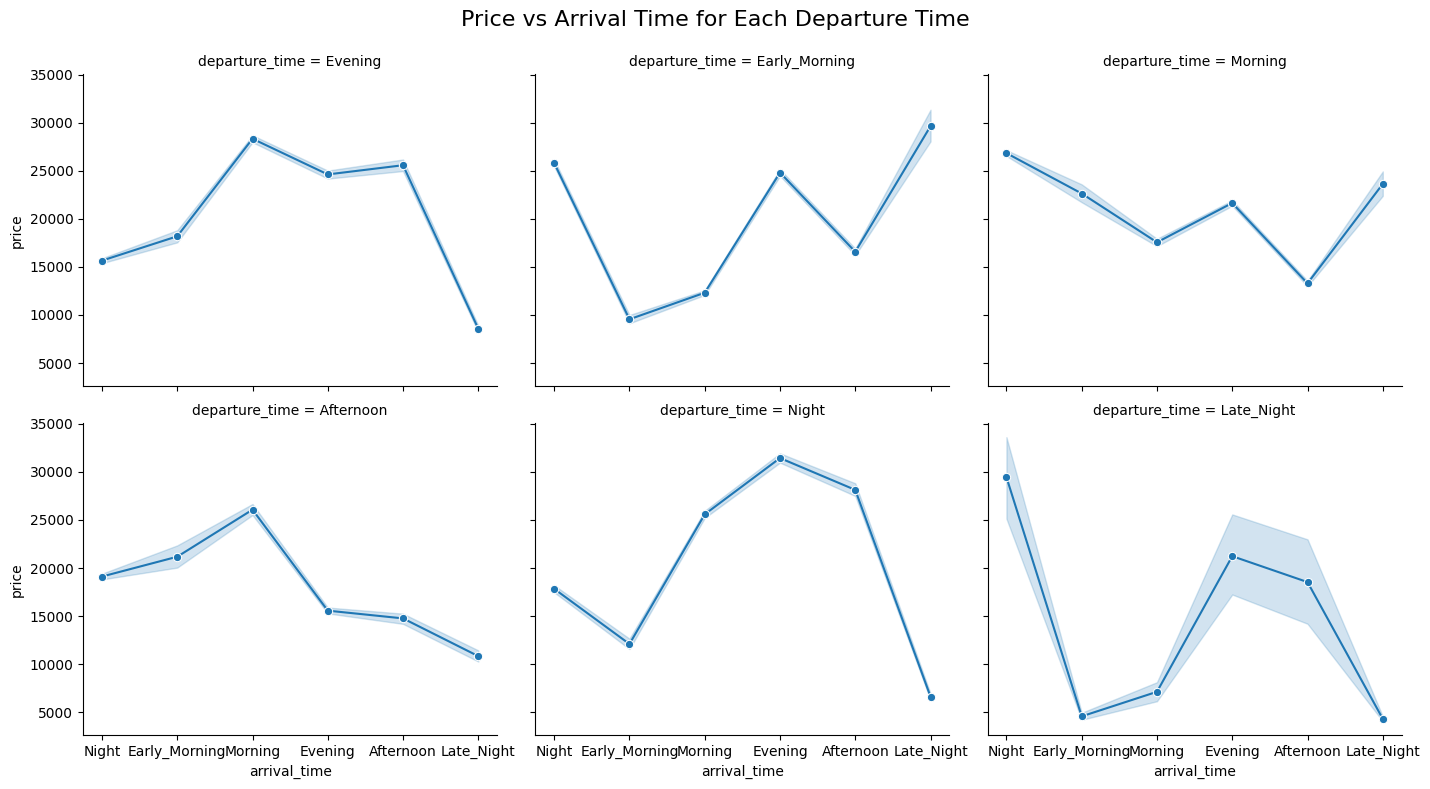

In [136]:
sns.relplot(
    x='arrival_time',
    y='price',
    data=df_copy,             # your dataframe
    col='departure_time',     # create separate plots per departure time
    kind='line',
    col_wrap=3,               # wrap after 3 plots
    height=4,                 # height of each facet
    aspect=1.2,               # aspect ratio
    marker="o",
    palette="viridis"
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Price vs Arrival Time for Each Departure Time", fontsize=16)
plt.show()


# How Price Changes WIth Change In Source Destination

In [137]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [140]:
df_copy.groupby("source_city")["price"].mean().sort_values(ascending = True) #Checking Mean Proice For each  Source_city

source_city
Delhi        18951.326639
Hyderabad    20155.623879
Bangalore    21469.460575
Mumbai       21483.818839
Kolkata      21746.235679
Chennai      21995.339871
Name: price, dtype: float64

In [141]:
df_copy.groupby("destination_city")["price"].mean().sort_values(ascending = True) #Checking Mean Proice For each destination_city

destination_city
Delhi        18436.767870
Hyderabad    20427.661284
Mumbai       21372.529469
Bangalore    21593.955784
Chennai      21953.323969
Kolkata      21959.557556
Name: price, dtype: float64

C:\Users\sajan\AppData\Local\Temp\ipykernel_6464\317821791.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.relplot(


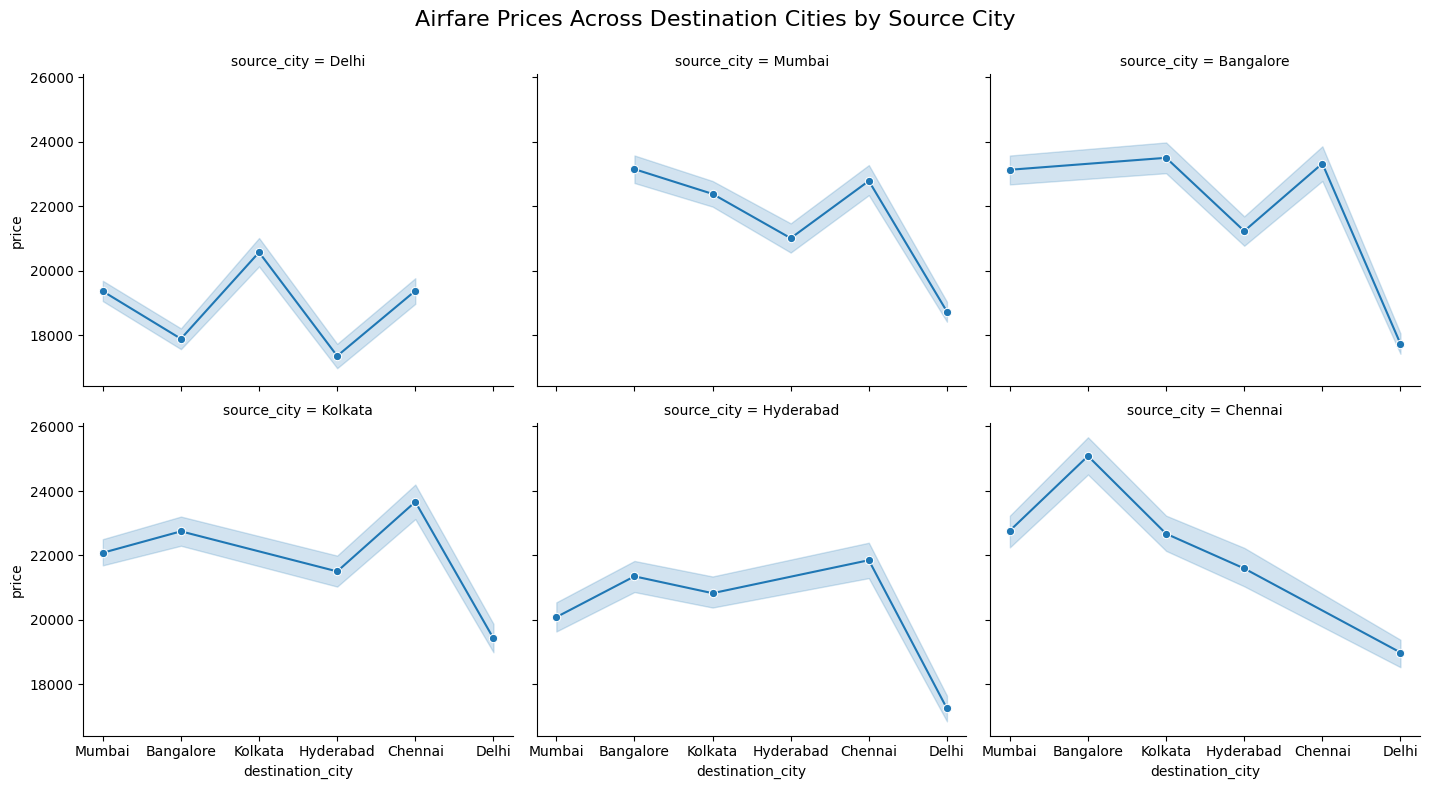

In [143]:
sns.relplot(
    x='destination_city',
    y='price',
    data=df_copy,             # your dataframe
    col='source_city',     # create separate plots per departure time
    kind='line',
    col_wrap=3,               # wrap after 3 plots
    height=4,                 # height of each facet
    aspect=1.2,               # aspect ratio
    marker="o",
    palette="viridis"
)

plt.subplots_adjust(top=0.9)
plt.suptitle("Airfare Prices Across Destination Cities by Source City", fontsize=16)
plt.show()


In [ ]:
# How Is The Price Affected If Bought Ticket In just 1 Or 2 Day Before the departure?

In [144]:
df_copy

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [147]:
df_copy["days_left"].nunique()

49

In [148]:
df_copy["days_left"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [149]:
df_copy.groupby("days_left")["price"].mean()

days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64

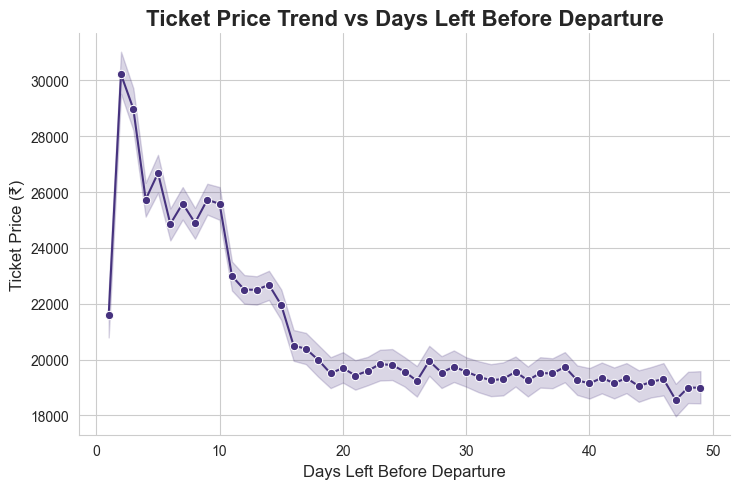

In [154]:
sns.set_style("whitegrid")  # clean style
sns.set_palette("viridis")  # professional color palette

sns.relplot(
    x="days_left",
    y="price",
    data=df_copy,
    kind="line",
    height=5,
    aspect=1.5,
    marker="o"
)

plt.title("Ticket Price Trend vs Days Left Before Departure", fontsize=16, weight="bold")
plt.xlabel("Days Left Before Departure", fontsize=12)
plt.ylabel("Ticket Price (₹)", fontsize=12)
plt.tight_layout()

plt.show()

In [ ]:
# How Doesz Price Vary Between Economy ANd Buisness Class

In [155]:
df_copy["class"].unique()

array(['Economy', 'Business'], dtype=object)

In [157]:
x = df_copy[df_copy["class"] == "Economy"]
x

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
206661,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7697
206662,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Economy,13.83,49,7709
206663,Vistara,UK-826,Chennai,Afternoon,one,Morning,Hyderabad,Economy,20.58,49,8640
206664,Vistara,UK-822,Chennai,Morning,one,Morning,Hyderabad,Economy,23.33,49,8640


In [ ]:
https://www.youtube.com/watch?v=gu3Ot78j_Gc&list=PLy3lFw0OTlutzXFVwttrtaRGEEyLEdnpy&index=3